## Networkx and osmnx

Simple explorations to learn about networkx 

In [1]:
import osmnx as ox, matplotlib.pyplot as plt, pandas as pd, geopandas as gpd
import networkx as nx
from IPython.display import IFrame
import folium

%matplotlib inline

Create a network from a simple lattice.  Note that in this case the node labels are tuples (e.g. `(1,2)`)

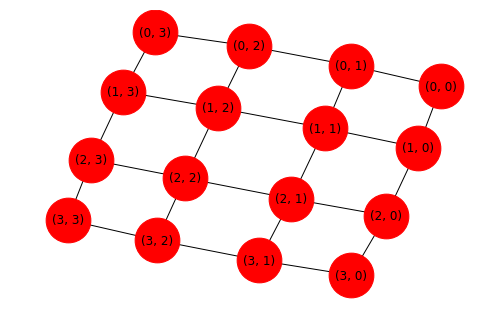

In [2]:
L = 4
G = nx.grid_2d_graph(L,L)
nx.draw(G,node_size=2000,with_labels=True,)
plt.show()

In [3]:
G.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)))

We can find all the immediate neighbors to any one node.

In [4]:
[g for g in G.neighbors((1,1))]

[(0, 1), (2, 1), (1, 0), (1, 2)]

And an adjacency matrix that summarizes the same.

In [5]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]]


The osmnx library allows one to pull in open street map data as network graphs.  THe nodes will be street intersections. The edges store information about the connections between nodes. 

Here I pull in the streets at a lat, lon near my neighborhood in Jackson Heights, Queens, NY

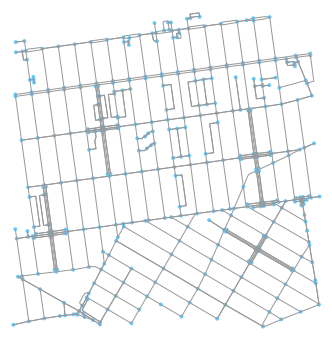

In [6]:
G = ox.graph_from_point(( 40.75,-73.88), distance=750, network_type='all')
ox.plot_graph(G);

In [7]:
G.nodes(data=True)

NodeDataView({42827849: {'y': 40.743399, 'x': -73.88887, 'osmid': 42827849}, 4453621867: {'y': 40.7540124, 'x': -73.8879255, 'osmid': 4453621867}, 42819699: {'y': 40.746104, 'x': -73.871771, 'osmid': 42819699}, 4453622295: {'y': 40.7541418, 'x': -73.8877263, 'osmid': 4453622295}, 4453622298: {'y': 40.7538923, 'x': -73.887686, 'osmid': 4453622298}, 4453622299: {'y': 40.7540312, 'x': -73.8877069, 'osmid': 4453622299}, 42926908: {'y': 40.751396, 'x': -73.888401, 'osmid': 42926908}, 42926923: {'y': 40.751982, 'x': -73.882823, 'osmid': 42926923}, 42926933: {'y': 40.752285, 'x': -73.880034, 'osmid': 42926933}, 5482677303: {'y': 40.7558408, 'x': -73.8797325, 'osmid': 5482677303}, 5482677311: {'y': 40.7558605, 'x': -73.8795081, 'osmid': 5482677311}, 5482677313: {'y': 40.7560358, 'x': -73.879382, 'osmid': 5482677313}, 5482677314: {'y': 40.7556833, 'x': -73.8806519, 'osmid': 5482677314}, 5482677319: {'y': 40.7560274, 'x': -73.8809258, 'osmid': 5482677319}, 5482677320: {'y': 40.7555248, 'x': -73.

We can see that there are 'too many' intersections for our purposes (i.e. places where minor intersections are indicated at the same broad  intersection as well as some passageways we're not really interested in. 

In [8]:
m = folium.Map(location=[40.75, -73.88], zoom_start =16, tiles='OpenStreetMap')

for nid, d in G.nodes(data=True):
    folium.Circle(location=[d['y'], d['x']], radius=5
                 ).add_to(m)

m

Each intersection node is identified by an `osmid` and its latitude and longitude.

In [11]:
G.nodes()

NodeView((42827849, 4453621867, 42819699, 4453622295, 4453622298, 4453622299, 42926908, 42926923, 42926933, 5482677303, 5482677311, 5482677313, 5482677314, 5482677319, 5482677320, 5427457331, 5427457332, 5427457333, 5482677621, 5482677622, 5482677624, 5427457335, 5427457336, 5427457337, 5427457339, 5427457340, 5427457343, 5427457344, 5427457345, 5427457348, 5427457349, 5357878474, 5357878483, 42804745, 5357878484, 4453729839, 42870320, 42870325, 42870329, 42870335, 42870338, 5357878495, 4453729864, 42870348, 42870355, 42870366, 42870371, 42870376, 42870382, 42870387, 42870392, 42870398, 42870399, 42870405, 42870412, 42870415, 5380458170, 5380458171, 5380458172, 5380458175, 5380458176, 5380458177, 5380458179, 5380458180, 5380458181, 5380458183, 5380458184, 5380458186, 5380458187, 5380458188, 5380458189, 42895131, 42895134, 42895139, 42846160, 42846164, 42846167, 42846177, 42846181, 3794790414, 3794790416, 42879009, 42879014, 42879019, 42846285, 42846288, 42846293, 42846297, 42846435, 42

In [9]:
len(G.nodes())

399

In [12]:
G.node[5427457339]

{'y': 40.7467057, 'x': -73.8749775, 'osmid': 5427457339, 'highway': 'crossing'}

In [13]:
[n for n in G.neighbors(5427457339)]

[42888084, 5427457331, 5427457332]

Information is stored with edges too.

In [16]:
G[42827849][42846181]

AtlasView({0: {'osmid': 51864971, 'name': 'Woodside Avenue', 'highway': 'tertiary', 'oneway': False, 'length': 76.294}})

We can easily move the data to geopandas

In [17]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [18]:
gdf_nodes.head(3)

,highway,osmid,x,y,geometry
42827849,NaN,42827849,-73.8889,40.7434,POINT (-73.88887 40.743399)
4453621867,NaN,4453621867,-73.8879,40.754,POINT (-73.88792549999999 40.7540124)
42819699,NaN,42819699,-73.8718,40.7461,POINT (-73.871771 40.746104)


In [19]:
gdf_edges.head(3)

,access,geometry,highway,key,lanes,length,name,oneway,osmid,ref,service,tunnel,u,v
0,NaN,"LINESTRING (-73.88887 40.743399, -73.887986 40...",tertiary,0,NaN,76.294,Woodside Avenue,False,51864971,NaN,NaN,NaN,42827849,42846181
1,NaN,"LINESTRING (-73.88792549999999 40.7540124, -73...",residential,0,NaN,98.010,79th Street,True,5707070,NaN,NaN,NaN,4453621867,4453729864
2,NaN,"LINESTRING (-73.88792549999999 40.7540124, -73...",service,0,NaN,18.531,NaN,False,448339842,NaN,parking_aisle,NaN,4453621867,4453622299


In [20]:
A = nx.adjacency_matrix(G)

In [21]:
type(A)

scipy.sparse.csr.csr_matrix

In [22]:
A.get_shape()

(399, 399)

THis adjacency matrix solves the problem of giving the closest connected intersection... but doesn't map onto Jeremy's dataset very cleanly because of the problem of lots of minor intersections here.